In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import flask as flsk
from pylab import rcParams


In [93]:
df=pd.read_csv('/content/Churn_Modelling (1).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [62]:
df.skew()

<ipython-input-62-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

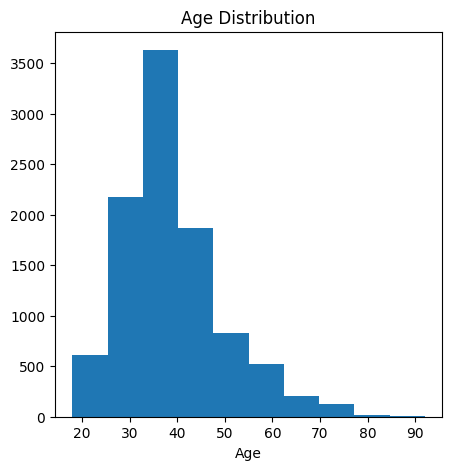

In [63]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

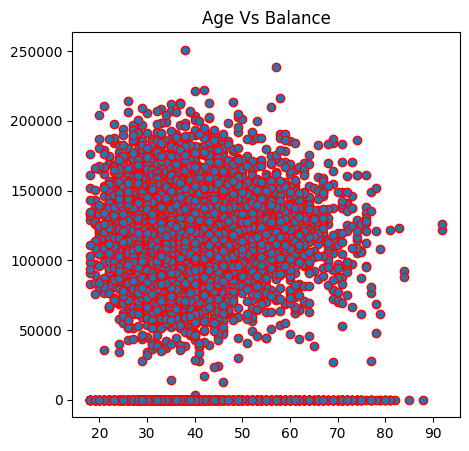

In [64]:
plt.scatter(df['Age'], df['Balance'],edgecolors='Red')
plt.title("Age Vs Balance")
plt.show()

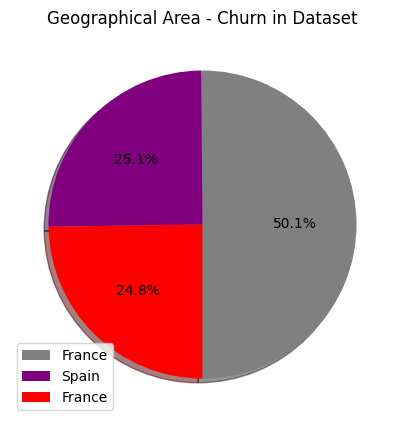

In [65]:
# Data to plot
sizes = df['Geography'].value_counts(sort = True)
labels=df['Geography']
colors = ["grey","purple","red"]
rcParams['figure.figsize'] = 5,5

# Plot
plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Geographical Area - Churn in Dataset')
plt.legend(labels)
plt.show()

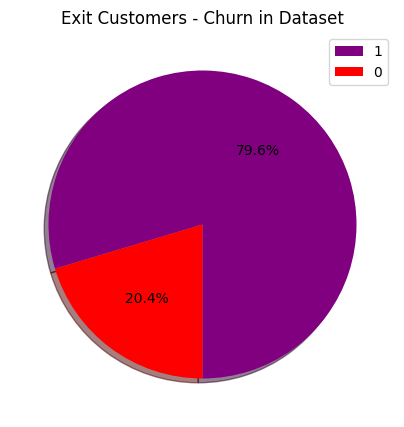

In [66]:
# Data to plot
sizes = df['Exited'].value_counts(sort = True)
labels=df['Exited']
colors = ["purple","red"]
rcParams['figure.figsize'] = 5,5

# Plot
plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Exit Customers - Churn in Dataset')
plt.legend(labels)
plt.show()

<ipython-input-67-6eeb4a69e3be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_data.corr(),annot=True,linewidths=2)


<Axes: >

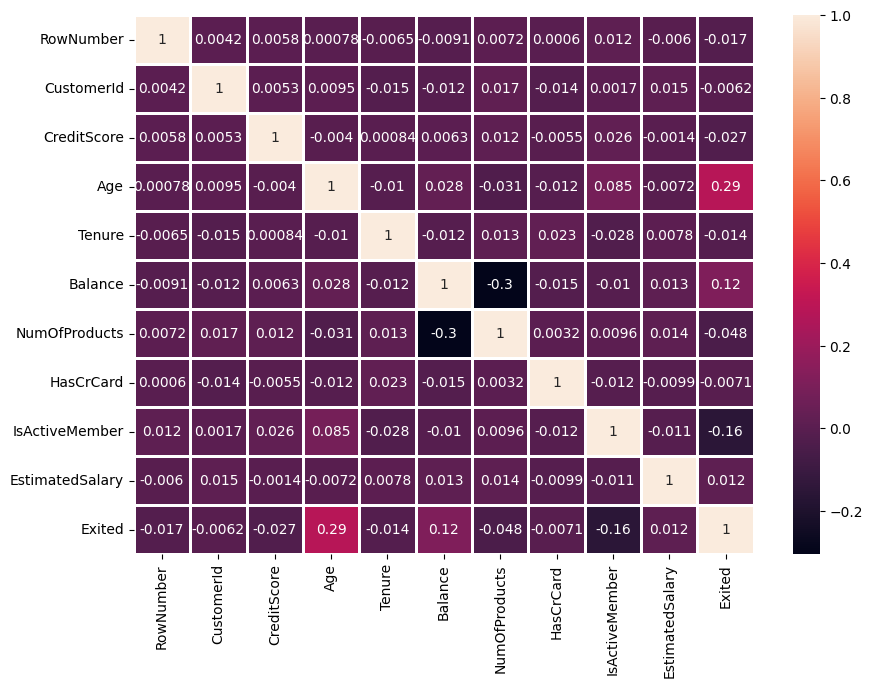

In [67]:
corr_data = pd.DataFrame(df)
plt.figure(figsize=(10,7))
sns.heatmap(corr_data.corr(),annot=True,linewidths=2)

In [68]:
dataset = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [69]:
columns=['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset[columns]=dataset[columns].apply(le.fit_transform)

In [70]:

dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [71]:
x = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)

In [74]:
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [75]:
y_pred = classifier.predict(x_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model1=accuracy_score(y_test,y_pred)
model1

0.8685

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred_lr=lr.predict(x_test)

In [79]:
model2=accuracy_score(y_test,y_pred_lr)
model2

0.789

In [80]:
from sklearn.svm import SVC
ss=SVC()
ss.fit(x_train,y_train)
y_pred_ss=ss.predict(x_test)


In [81]:
model3=accuracy_score(y_test,y_pred_ss)
model3

0.7975

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)

In [83]:
model4=accuracy_score(y_pred_dt,y_test)
model4

0.7885

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb= xgb.predict(x_test)

In [85]:
model5=accuracy_score(y_test,y_pred_xgb)
model5

0.85

In [86]:
model_names=['Random Forest','Logistic Regression','SVM','Decision Tree','XGBOOST']
accuracies=[model1,model2,model3,model4,model5]
df = pd.DataFrame({'Model Name': model_names, 'Accuracy': accuracies})
df

,Model Name,Accuracy
0,Random Forest,0.8685
1,Logistic Regression,0.7890
2,SVM,0.7975
3,Decision Tree,0.7885
4,XGBOOST,0.8500


In [87]:
import joblib
joblib.dump(classifier, "churn_pred.pkl")

['churn_pred.pkl']

In [88]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,597,1,0,35,8,131101.04,1,1,1,192852.67
898,523,0,0,40,2,102967.41,1,1,0,128702.10
2398,706,2,0,42,8,95386.82,1,1,1,75732.25
5906,788,0,1,32,4,112079.58,1,0,0,89368.59
2343,706,1,1,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...,...,...
1037,625,0,0,24,1,0.00,2,1,1,180969.55
2899,586,0,0,35,7,0.00,2,1,0,70760.69
9549,578,2,1,36,1,157267.95,2,1,0,141533.19
2740,650,1,1,34,4,142393.11,1,1,1,11276.48


In [89]:
obj = joblib.load("churn_pred.pkl")

In [92]:
list = [502,0,0,42,8,159660.80,3,1,0,113931.57]
print(obj.predict([list]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
